In [1]:
from data.sp_data import SPData
from models import SPCplex, SPQuboBinary
from models import SPQuboBinaryBG
from evaluation.evaluation import SPEvaluation
from plotting.sp_plot import SPPlot

import networkx as nx
# import matplotlib
# matplotlib.use('Qt5Agg')  # Or 'Qt5Agg', depending on your system
# import matplotlib.pyplot as plt

import neal

from run_processor import do_optimization

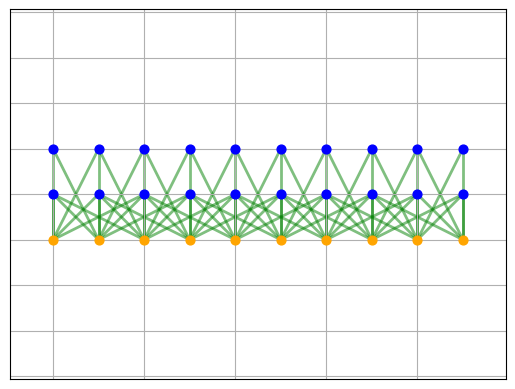

In [2]:

# params = {"lidar_density": 0.5, "street_point_density": 0.5}
# data = SPData().create_problem_from_glb_file(**params)

params = {"version": 2, "num_cols": 10, "rad_max": 2.4}
data = SPData().gen_problem(**params) 

plt = SPPlot(data).plot_problem()
plt.show()


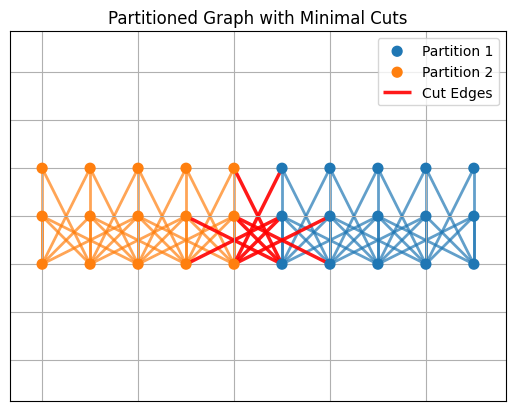

In [3]:
# Assess interactions with a desired number of partitions
partitions, cut_size, intra_edges, inter_edges, complexity_info = data.assess_interactions(num_partitions=2)

# Convert cut edges to a list (from generator in edge_boundary)
cut_edges = list(nx.edge_boundary(data.G, *partitions))

# Plot partitions
plotter = SPPlot(data)
plt = plotter.plot_partitioned_graph(partitions, cut_edges)
plt.show()

In [4]:
pat_datas = data.partition_data(num_partitions=2)

In [5]:
# for key in dir(pat_datas[0]):
#     if not key.startswith("_"):
#         if (key == "G" or key == "M") or key == "O":
#             print(key, getattr(pat_datas[0], key))
#         elif key == "listLidar3D" or key == "listStreetPoints3D":
#             print(key, len(getattr(pat_datas[0], key)))
#         else:
#             print(key, getattr(pat_datas[0], key))

In [6]:
merge_data = SPData().merge_data(pat_datas)

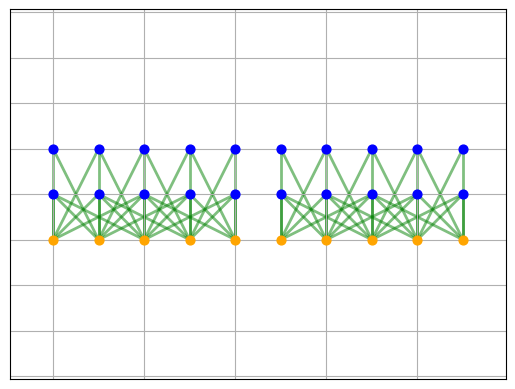

In [7]:
plt = SPPlot(merge_data).plot_problem()
plt.show()

In [16]:
pat_datas = data.partition_data(num_partitions=2)

# pat_datas = [data]

In [21]:
answer_list = []
for data_i in pat_datas:
# for data_i in [pat_datas]:
            
    # cplex_model = SPCplex(data_i)
    # answer = cplex_model.solve(TimeLimit=1)
    # config = {"num_reads":1000,"num_sweeps":1000}
    config = {}
    # solve_func = neal.SimulatedAnnealingSampler().sample_qubo
    solve_func = do_optimization
    qubo_model_bin = SPQuboBinaryBG(data_i)
    # print(qubo_model_bin.model- qubo_model_bin.model.T)
    # print(qubo_model_bin.usedLidars[0])

    answer = qubo_model_bin.solve(solve_func, **config)
    answer_list.append(answer)


    # print(f"answer.solution = {answer['solution']}")
    # # lenght of the solution
    # print(f"len(answer.solution) = {len(answer['solution'])}")
    # evaluation = SPEvaluation(data_i, answer["solution"])
    # print(f"solution clean: {evaluation.solution}")

    # print(f"objective = {evaluation.get_objective()}")
    # for constraint, violations in evaluation.check_solution().items():
    #     if len(violations) > 0:
    #         print(f"constraint {constraint} was violated {len(violations)} times")

    # plt = SPPlot(data_i, evaluation).plot_solution(hide_never_covered = True)
    # # show x,y axis (labels)
    # plt.show()


myQUBOMatrix = [[ -9.  10.   8.   4.   2.  -2.  -4.   0.   0.  -2.  -4.  -2.   0.  -2.
   -4.  -8.  -2.  -4.   0.   0.   0.   0.   0.   0.]
 [ 10. -13.  12.   8.   4.  -2.  -4.  -2.  -4.  -2.  -4.  -2.   0.  -2.
   -4.  -8.  -2.  -4.   0.   0.  -2.  -4.   0.   0.]
 [  8.  12. -15.  12.   8.  -2.  -4.  -2.  -4.  -2.  -4.   0.   0.  -2.
   -4.  -8.  -2.  -4.  -2.  -4.  -2.  -4.  -2.  -4.]
 [  4.   8.  12. -13.  10.  -2.  -4.  -2.  -4.   0.   0.   0.  -2.  -2.
   -4.  -8.   0.   0.  -2.  -4.  -2.  -4.  -2.  -4.]
 [  2.   4.   8.  10.  -9.   0.   0.   0.   0.   0.   0.   0.  -2.  -2.
   -4.  -8.   0.   0.  -2.  -4.  -2.  -4.  -2.  -4.]
 [ -2.  -2.  -2.  -2.   0.   6.   4.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ -4.  -4.  -4.  -4.   0.   4.  16.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  -2.  -2.  -2.   0.   0.   0.   6.   4.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.  

In [ ]:
# answer_list.append(answer)

In [22]:
list_of_available = dir(answer_list[0]["answer"])
for i in list_of_available:
    if not i.startswith("_"):
        # print(f"{i}")
        pass
        # print(f"{answer_list[0]['answer'][i]}")


print(f"answer_list[0]['answer'].sample = {list(answer_list[0]['answer'].sample.values())}")


answer_list[0]['answer'].sample = [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
# print(dir(answer))

In [23]:

# entire evaluation
answer_merge = {
    "solution": {}
}


for answer in answer_list:
    print(f"answer.solution = {answer['solution']}")
    answer_merge["solution"].update(answer['solution'])
# for key in answer_merge["solution"]:
#     print(f"key = {key}")

print(f"(answer_merge.solution) = {(answer_merge['solution'])}")

answer.solution = {'x_9.0_0.0_2.5_0_-10': 1, 'x_8.0_0.0_2.5_0_-10': 0, 'x_7.0_0.0_2.5_0_-10': 0, 'x_6.0_0.0_2.5_0_-10': 1, 'x_5.0_0.0_2.5_0_-10': 0}
answer.solution = {'x_0.0_0.0_2.5_0_-10': 0, 'x_1.0_0.0_2.5_0_-10': 1, 'x_3.0_0.0_2.5_0_-10': 0, 'x_4.0_0.0_2.5_0_-10': 1, 'x_2.0_0.0_2.5_0_-10': 0}
(answer_merge.solution) = {'x_9.0_0.0_2.5_0_-10': 1, 'x_8.0_0.0_2.5_0_-10': 0, 'x_7.0_0.0_2.5_0_-10': 0, 'x_6.0_0.0_2.5_0_-10': 1, 'x_5.0_0.0_2.5_0_-10': 0, 'x_0.0_0.0_2.5_0_-10': 0, 'x_1.0_0.0_2.5_0_-10': 1, 'x_3.0_0.0_2.5_0_-10': 0, 'x_4.0_0.0_2.5_0_-10': 1, 'x_2.0_0.0_2.5_0_-10': 0}


objective = 4


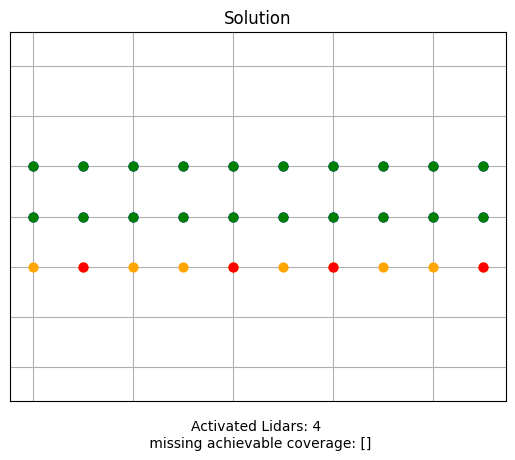

In [24]:
evaluation_merge = SPEvaluation(data, answer_merge["solution"])
print(f"objective = {evaluation_merge.get_objective()}")
for constraint, violations in evaluation_merge.check_solution().items():
    if len(violations) > 0:
        print(f"constraint {constraint} was violated {len(violations)} times")

plt = SPPlot(data, evaluation_merge).plot_solution(hide_never_covered = True)
# show x,y axis (labels)
plt.show()